In [1]:
from utils.fem_utils import WaveguideTemplate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sin_strip = WaveguideTemplate(
    n_core=2.0,       # SiN
    n_box=1.444,      # SiO2
    thickness=0.4,   # 220nm
    domain_width=7.0, # Wide simulation window
)

In [3]:
widths = np.linspace(0.3, 3.0, 50)

# List to store the results for every width
all_guided_modes = []

print(f"Starting sweep for SiN Waveguide (Thickness={sin_strip.thickness}um, n={sin_strip.n_core})...")

# --- 2. Run the Sweep ---
for width in widths:
    guided_modes = sin_strip.solve_modes(width=width, num_modes=10)

    # Classify modes by polarization (TE/TM)
    te_count = 0
    tm_count = 0

    for mode in guided_modes:
        if mode.te_fraction > 0.5:
            label = f"TE{te_count}"
            te_count += 1
        else:
            label = f"TM{tm_count}"
            tm_count += 1

        # Store data
        all_guided_modes.append({
            "width": width,
            "label": label,
            "n_eff": np.real(mode.n_eff),
        })

    print(f"Width {width:.2f}um: Found {te_count} TE, {tm_count} TM modes")

Starting sweep for SiN Waveguide (Thickness=0.4um, n=2.0)...
Width 0.30um: Found 0 TE, 0 TM modes
Width 0.36um: Found 0 TE, 0 TM modes
Width 0.41um: Found 0 TE, 0 TM modes
Width 0.47um: Found 0 TE, 0 TM modes
Width 0.52um: Found 0 TE, 0 TM modes
Width 0.58um: Found 1 TE, 0 TM modes
Width 0.63um: Found 1 TE, 0 TM modes
Width 0.69um: Found 1 TE, 0 TM modes
Width 0.74um: Found 1 TE, 1 TM modes
Width 0.80um: Found 1 TE, 1 TM modes
Width 0.85um: Found 1 TE, 1 TM modes
Width 0.91um: Found 1 TE, 1 TM modes
Width 0.96um: Found 1 TE, 1 TM modes
Width 1.02um: Found 1 TE, 1 TM modes
Width 1.07um: Found 1 TE, 1 TM modes
Width 1.13um: Found 1 TE, 1 TM modes
Width 1.18um: Found 1 TE, 1 TM modes
Width 1.24um: Found 1 TE, 1 TM modes
Width 1.29um: Found 1 TE, 1 TM modes
Width 1.35um: Found 1 TE, 1 TM modes
Width 1.40um: Found 1 TE, 1 TM modes
Width 1.46um: Found 2 TE, 1 TM modes
Width 1.51um: Found 2 TE, 1 TM modes
Width 1.57um: Found 2 TE, 1 TM modes
Width 1.62um: Found 2 TE, 1 TM modes
Width 1.68um: 

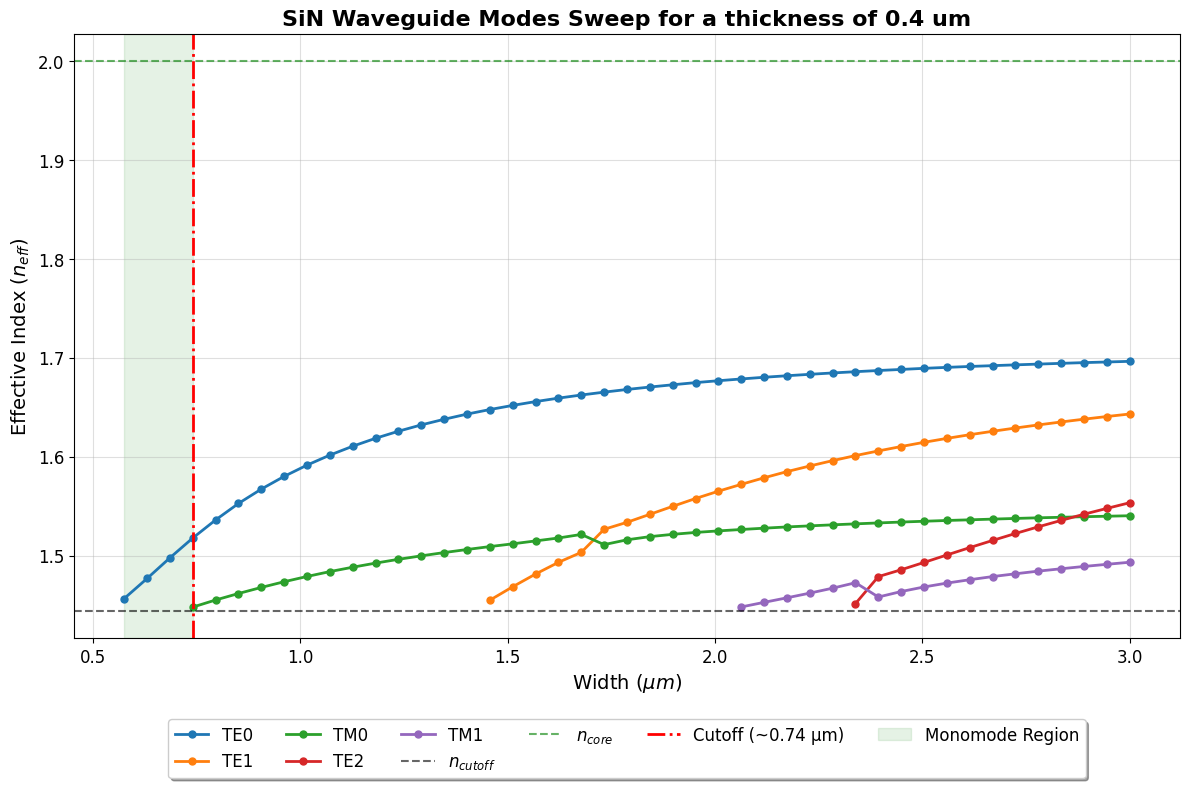

In [4]:
sin_strip.plot_modes(all_guided_modes, title=f"SiN Waveguide Modes Sweep for a thickness of {sin_strip.thickness} um")
plt.show()